In [91]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [129]:
def ref_loss(file_name,d):

  df=pd.read_csv(file_name,skip_blank_lines=True)
  df.columns=["frequency","e'","e''","u'","u''"]
  freq = np.array(df['frequency'])
  e1 = np.array(df["e'"])
  e2 = np.array(df["e''"])
  u1 = np.array(df["u'"])
  u2 = np.array(df["u''"])

  c = 3*10e+8
  k = 2*np.pi/c

  ur = u1 - 1j*u2
  er = e1 - 1j*e2
  z = np.sqrt(ur/er) * np.tanh( 1j * k * np.sqrt(ur*er) * freq * d )
  R = 20* np.log(abs((z-1)/(z+1)))
  return z,R

In [130]:
d = 0.00025
z1,r1 = ref_loss('BFO.csv',d)
z2,r2 = ref_loss('La_BFO.csv',d)
z3,r3 = ref_loss('Sr_BFO.csv',d)

In [131]:
display(min(abs(z1)),min(abs(z2)),min(abs(z3)))

0.0003658128024409437

0.00029686262616921094

0.00038409064075289737

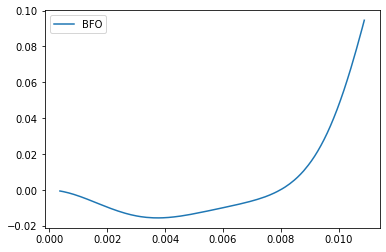

In [132]:
fig = plt.figure()
plt.plot(abs(z1),r1)
plt.legend(['BFO','La_BFO','Sr_BFO'])
plt.show()

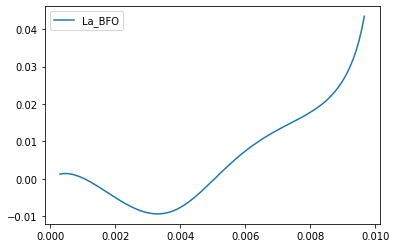

In [133]:
fig = plt.figure()

plt.plot(abs(z2),r2)

plt.legend(['La_BFO','Sr_BFO'])
plt.show()

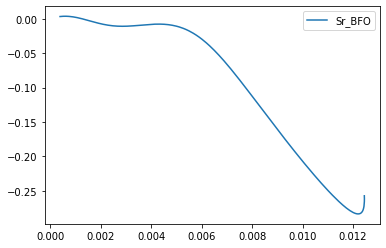

In [134]:
fig = plt.figure()
plt.plot(abs(z3),r3)
plt.legend(['Sr_BFO'])
plt.show()

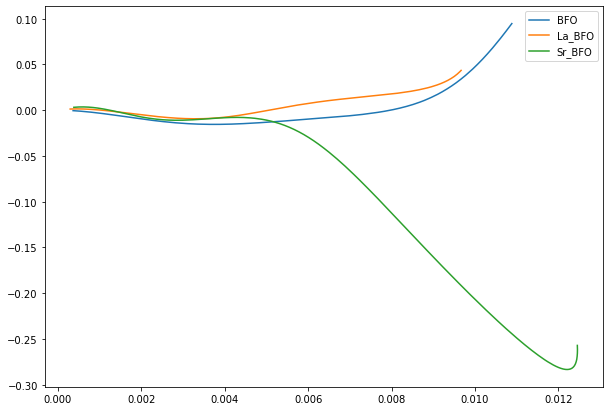

In [135]:
fig = plt.figure(figsize=[10,7])
plt.plot(abs(z1),r1)
plt.plot(abs(z2),r2)
plt.plot(abs(z3),r3)
plt.legend(['BFO','La_BFO','Sr_BFO'])
plt.show()